# Importing libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from string import punctuation as punc
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Suge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
dataset_df = pd.read_csv('amazon_reviews.csv', keep_default_na=False)

# Performing exploratory data analysis

In [3]:
dataset_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [4]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [5]:
dataset_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [6]:
dataset_df['length'] = dataset_df['verified_reviews'].apply(len)

<Axes: >

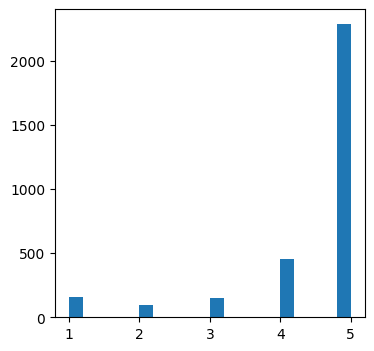

In [7]:
dataset_df['rating'].hist(grid=False, bins=20, figsize=(4,4))

<Axes: >

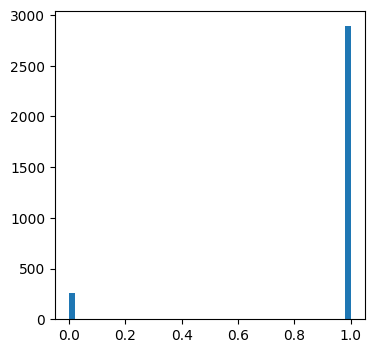

In [8]:
dataset_df['feedback'].hist(grid=False, bins=50, figsize=(4,4))

<Axes: ylabel='Frequency'>

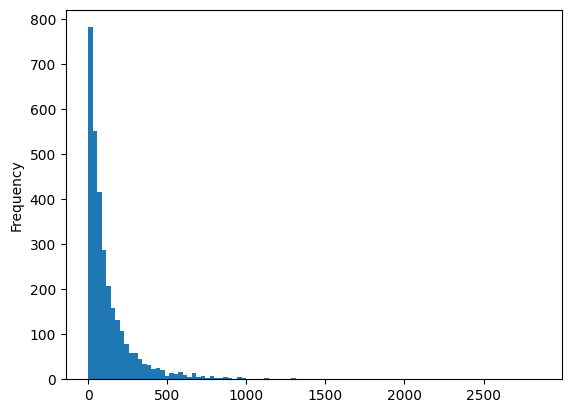

In [9]:
dataset_df['length'].plot.hist(bins=100)

In [10]:
#The longest review and its length
print(dataset_df[  dataset_df['length']==dataset_df['length'].max()]['verified_reviews'], len(dataset_df['length']), sep="\n")


2016    Incredible piece of technology.I have this rig...
Name: verified_reviews, dtype: object
3150


## Wordcloud

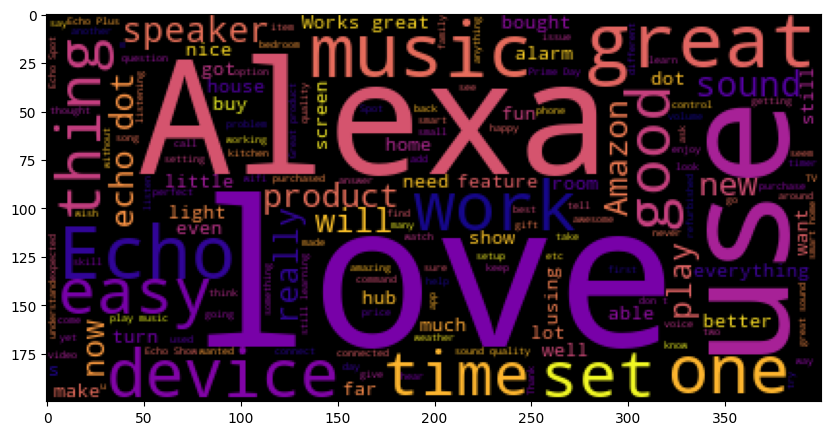

In [11]:
wordcloud = dataset_df['verified_reviews'].tolist()
wordcloud = " ".join(wordcloud)
plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(wordcloud).recolor(colormap="plasma", random_state=3))

# Data cleaning

In [12]:
def text_cleaner(text):
    text_clean = [ char for char in text if char not in punc]
    text_clean = "".join(text_clean)
    text_clean = [ word for word in text_clean.split() if word.lower() not in stopwords.words('english')]
    return text_clean

In [13]:
dataset_df_clean = dataset_df['verified_reviews'].apply(text_cleaner)
dataset_df_clean[1000]

['great', 'music', 'little', 'hard', 'figure', 'works']

In [14]:
dataset_df['verified_reviews'][1000]

"it's great for music, a little hard to figure out how it works."

# Vectorization

In [15]:
vect = CountVectorizer(analyzer = text_cleaner, dtype = np.uint8)
dataset_df_vect = vect.fit_transform(dataset_df['verified_reviews'])

In [16]:
vect.get_feature_names_out()

array(['072318', '1', '10', ..., '😬', '😳', '🤓'], dtype=object)

In [17]:
X = pd.DataFrame(dataset_df_vect.toarray())
y = dataset_df['feedback']

In [18]:
X.shape

(3150, 5211)

In [19]:
y.shape

(3150,)

# Training&Testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### Naive Bayes Classifier

In [ ]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

y_predict = NB_classifier.predict(X_test)

<Axes: >

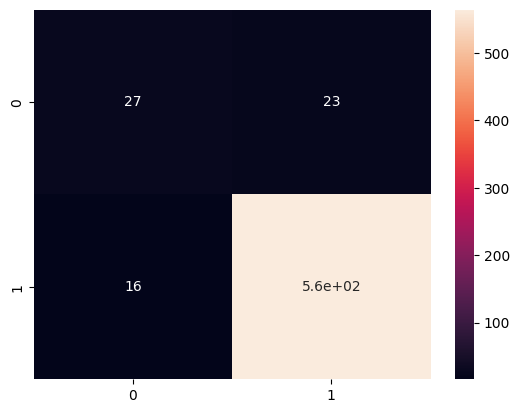

In [21]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

In [22]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.63      0.54      0.58        50
           1       0.96      0.97      0.97       580

    accuracy                           0.94       630
   macro avg       0.79      0.76      0.77       630
weighted avg       0.93      0.94      0.94       630

